Image Processing in Computer Vision

Image processing refers to a comprehensive set of techniques aimed at manipulating and analyzing digital images to extract meaningful information or enhance their visual quality. These techniques are essential in computer vision applications and include:  

1. Image Transformation: Modifying or changing images through:  
   - **Geometric Transformations** (e.g., scaling, rotation)  
   - **Fourier Transform** (frequency domain analysis)  
   - **Intensity Transformations** (e.g., brightness and contrast adjustments)  

2. **Image Enhancement**: Improving the visual quality or clarity of images by highlighting critical features or minimizing noise and distortions. Techniques include:  
   - **Histogram Equalization**  
   - **Contrast Enhancement**  
   - **Image Sharpening**  
   - **Color Correction**  

3. **Noise Reduction Techniques**: Removing unwanted noise while preserving essential details like edges and textures. Popular methods are:  
   - **Gaussian Smoothing**  
   - **Median Filtering**  
   - **Bilateral Filtering**  
   - **Wavelet Denoising**  

4. **Morphological Operations**: Processing images based on their structure and shape to analyze regions or boundaries. Common operations are:  
   - **Erosion and Dilation**  
   - **Opening and Closing**  
   - **Morphological Gradient**  

These techniques form the foundation of modern computer vision, enabling tasks like object detection, image segmentation, and feature extraction.  


**Plan for the Notebook**
We will explore each of these concepts step by step, providing detailed explanations and corresponding Python code implementations for practical understanding.



# Image Transformations with OpenCV

- We will start with Image Transformation, where we’ll cover geometric transformations, Fourier transforms, and intensity transformations.
- Code examples will demonstrate how to apply these techniques to manipulate images effectively.

In [7]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Geometric Transformations

```
# Ce texte est au format code
```

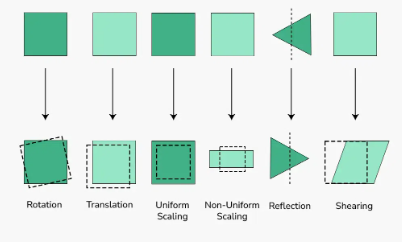!

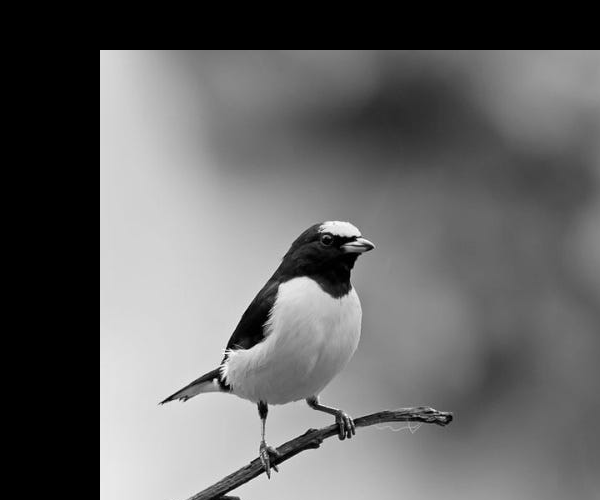

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import os

# Define the image path that is been load from ur drive
image_path = '/content/image_test.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print("Error: File not found. Check the path!")
else:
    # Read the image
    img = cv.imread(image_path)

    if img is None:
        print("Error: Unable to load image. Ensure you have valid image file.")
    else:
        # Get the image dimensions
        rows, cols = img.shape[:2]
        M = np.float32([[1, 0, 100], [0, 1, 50]])
        # Lets Apply affine transformation
        dst = cv.warpAffine(img, M, (cols, rows))
        # Display the transformed image
        cv2_imshow(dst)



Lets try to flip the image horizontally and vertically



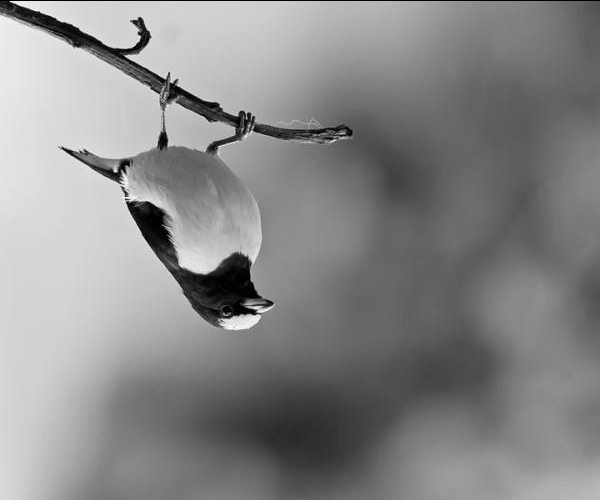

In [13]:
M_h = np.float32([[1, 0, 0], [0, -1, rows],[0,  0, 1]])
flipped_img_h = cv.warpPerspective(img, M_h, (cols, rows))
cv2_imshow(flipped_img_h)

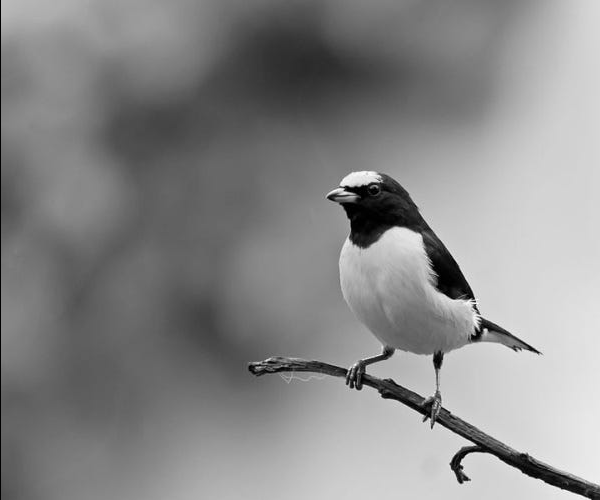

In [14]:
M_v = np.float32([[-1, 0, cols], [0, 1, 0], [0, 0, 1]])
flipped_img_v= cv.warpPerspective(img, M_v, (cols, rows))
cv2_imshow(flipped_img_v)

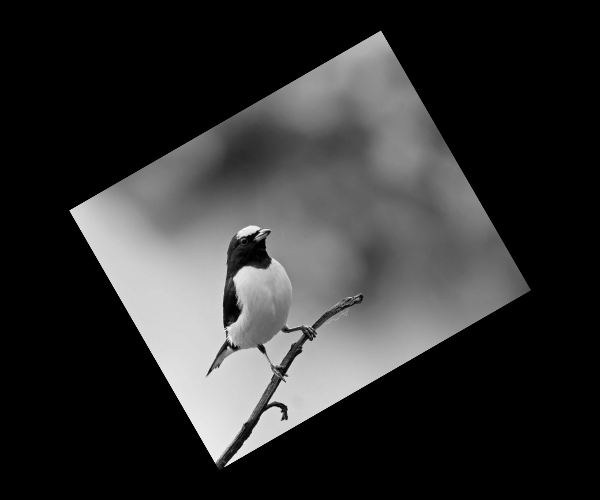

In [22]:
#Image rotation
img_rotation = cv.warpAffine(img,cv.getRotationMatrix2D((cols/2, rows/2), 30, 0.6),(cols, rows))
cv2_imshow(img_rotation)

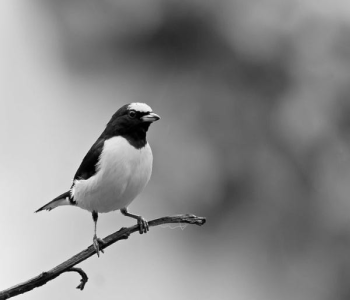

In [23]:
#Shrinking an image:
img_shrinked = cv.resize(img, (350, 300),interpolation = cv.INTER_AREA)
cv2_imshow(img_shrinked)

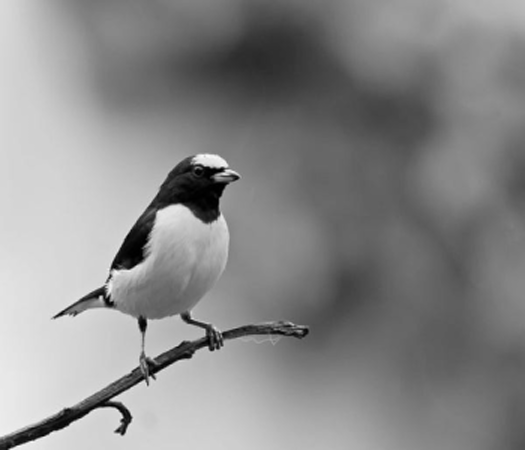

In [24]:
#Enlarging Image
img_enlarged = cv.resize(img_shrinked, None,fx=1.5, fy=1.5,interpolation=cv.INTER_CUBIC)
cv2_imshow(img_enlarged)

## *Fourier Transform*
-here we first load the image and convert it to grayscale using the cv.imread() and cv.cvtColor() functions. Then, we compute the discrete Fourier Transform of the image using the cv2.dft() function and store the result in the ‘fourier’ variable.

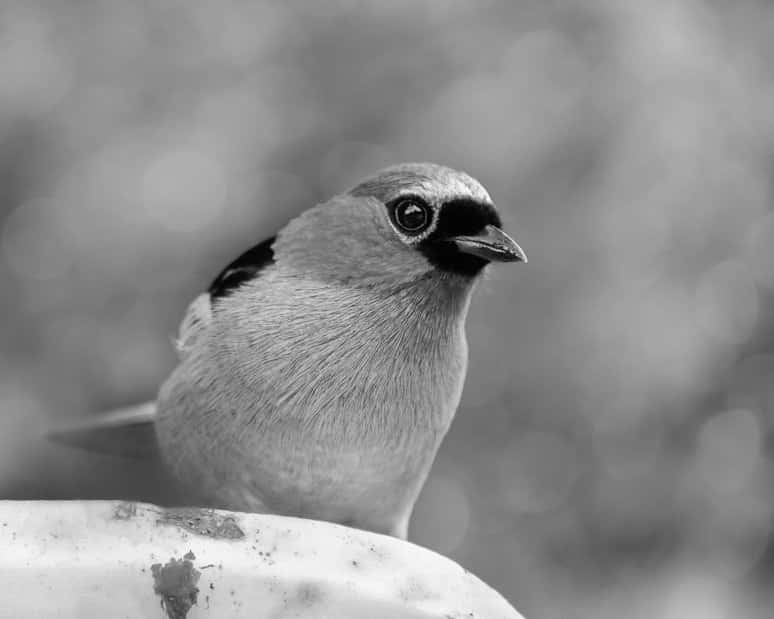

array([[91, 91, 90, ..., 95, 91, 88],
       [90, 89, 94, ..., 95, 92, 82],
       [82, 87, 92, ..., 92, 91, 87],
       ...,
       [82, 87, 91, ..., 88, 92, 87],
       [90, 82, 92, ..., 92, 94, 89],
       [91, 88, 91, ..., 92, 90, 91]], dtype=uint8)
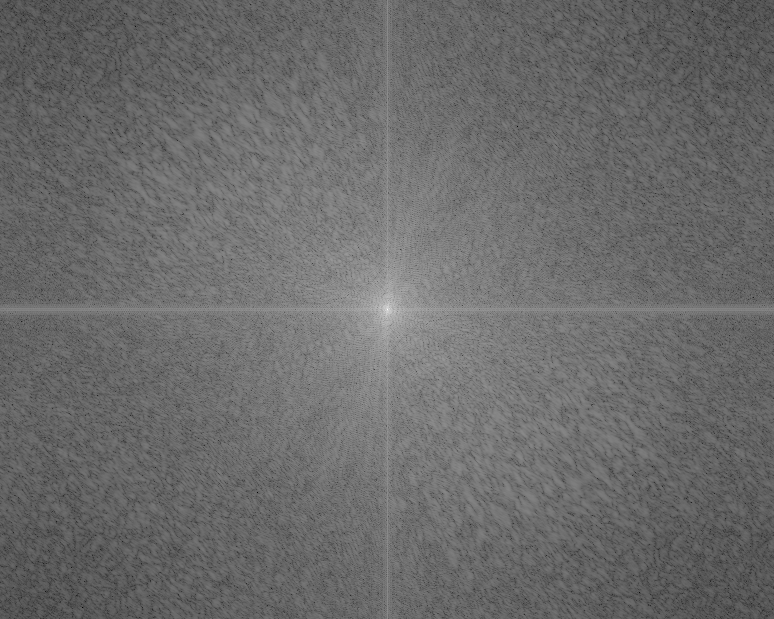

In [32]:

image_path = '/content/image_test2.jpg'
# now we will be loading the image and converting it to grayscale
image = cv.imread(image_path)
gray = cv.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
# Compute the discrete Fourier Transform of the image
fourier = cv.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX, cv.CV_8UC1)

magnitude



## *Intensity Transformation*

In [34]:
image_path = '/content/image_test3.jpg'
img = cv.imread(image_path)
# Lets Apply a log transform.
c = 255/(np.log(1 + np.max(img)))
log_transformed = c * np.log(1 + img)
log_transformed = np.array(log_transformed, dtype = np.uint8)

cv.imwrite('log_transformed.jpg', log_transformed)

<ipython-input-34-593007162158>:5: RuntimeWarning: divide by zero encountered in log
  log_transformed = c * np.log(1 + img)
<ipython-input-34-593007162158>:6: RuntimeWarning: invalid value encountered in cast
  log_transformed = np.array(log_transformed, dtype = np.uint8)


True

### Lets apply the Power-Law (Gamma) Transformation –
- This is a type of intensity transformation used to adjust the brightness and contrast of an image. It operates on the pixel values of an image by applying a nonlinear function of the form:

\[
s = c \cdot r^\gamma
\]

Where:
- \(s\) is the output pixel value (transformed value).
- \(r\) is the input pixel value (original intensity).
- \(c\) is a constant that controls the overall brightness.
- \(\gamma\) (gamma) is the exponent that determines the nature of the transformation.

### Key Characteristics:
- **Gamma < 1**: Darkens the image (enhances details in darker regions).
- **Gamma > 1**: Brightens the image (enhances details in brighter regions).
- **Gamma = 1**: The image remains unchanged (linear transformation).

Gamma correction is often used to correct for non-linearities in image displays and sensors, and is commonly applied in image enhancement, television broadcasting, and image preprocessing in computer vision.

In [35]:

# Lets try  4 gamma values.
for gamma in [0.1, 0.5, 1.2, 2.2]:

    # Apply gamma correction.
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

    # Save the images.
    cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)


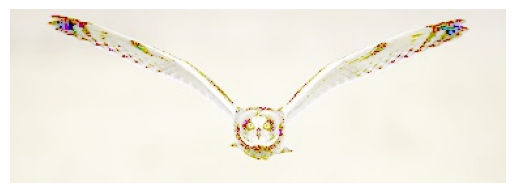

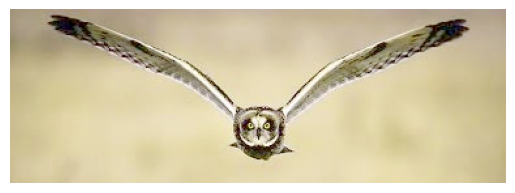

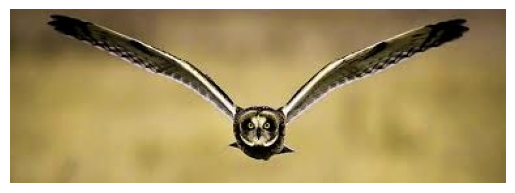

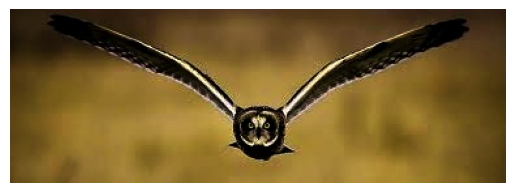

In [38]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the base path where the saved images are stored
base_path = '/content/gamma_transformed'  # Base path without the number part
file_extension = '.jpg'  # Update this if your images are in a different format
image_values = [0.1, 0.5, 1.2, 2.2]  # the 4 Gamma values defined before

# Loop to load and display the images
for value in image_values:

    image_path = f'{base_path}{value}{file_extension}'

    try:
        image = Image.open(image_path)
        # Display the image using Matplotlib
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

